Some labels are wrong in test data

In [5]:
!nvidia-smi

Wed Aug  4 02:06:30 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
from google.colab import drive # Import a library named google.colab
drive.mount('/content/drive', force_remount=True) # mount the content to the directory `/content/drive`

%cd /content/drive/MyDrive/Tensorflow_Practice
# !mkdir HW13     # I HAVE MADE IT.

Mounted at /content/drive
/content/drive/MyDrive/Tensorflow_Practice


In [66]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models 
import matplotlib.pyplot as plt 
import numpy as np 

In [67]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [68]:
X_test.shape

(10000, 32, 32, 3)

In [69]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [85]:
y_train = y_train.reshape(-1, )
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [71]:
classes =  ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"] # test 


In [72]:
def plot_sample(X, y, index):
  plt.figure(figsize = (2, 5))
  plt.imshow(X_train[index])
  plt.xlabel(classes[y[index]])
  

6
9
9
4
1
1
2
7
8
3
4
7
7
2
9


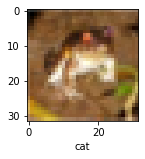

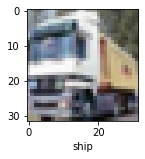

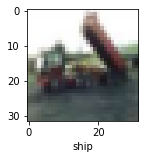

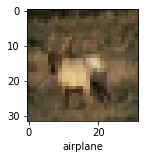

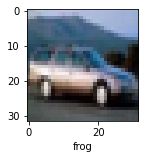

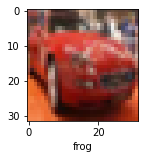

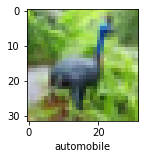

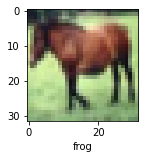

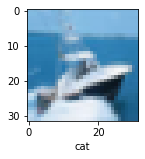

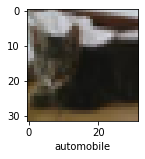

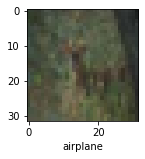

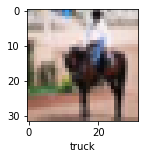

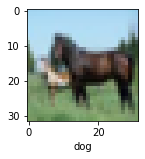

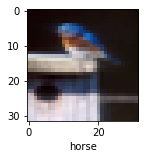

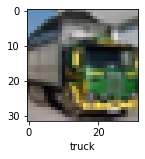

In [93]:
for i in range(5):
  # print(y_train[i])
  plot_sample(X_test, y_test, i)

In [74]:
# the scaling part 
X_train = X_train / 255 
X_test = X_test / 255 

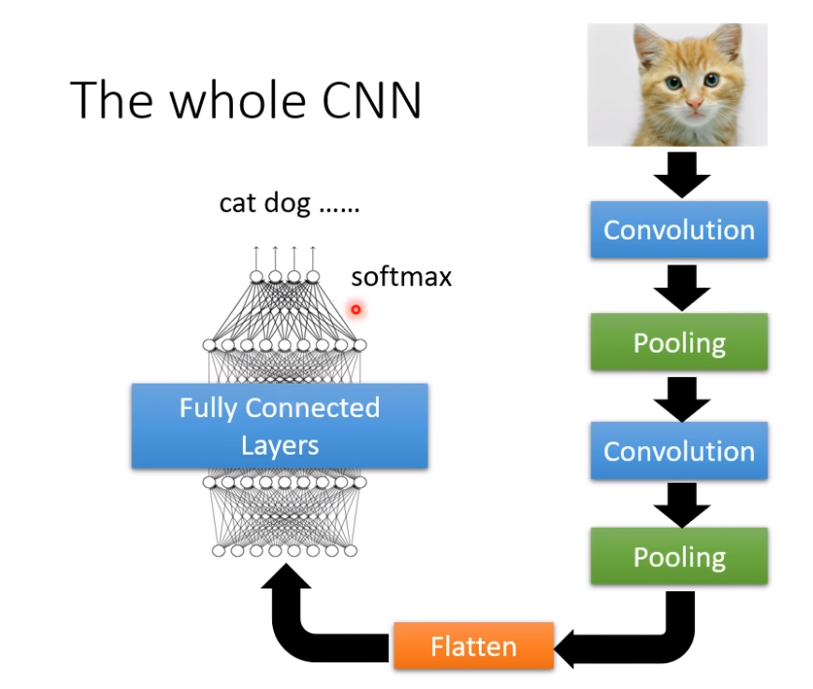

In [75]:
cnn  = models.Sequential([             
          # cnn 
          layers.Conv2D(filters=30, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),
          layers.MaxPooling2D((2, 2)),

          layers.Conv2D(filters=50, kernel_size=(3,3), activation='relu' ),
          layers.MaxPooling2D((2, 2)),
          # dense 
          layers.Flatten(),
          layers.Dense(64, activation='relu'),
          layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy', 
            metrics=['accuracy'])

In [76]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4985 - accuracy: 0.4589
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1779 - accuracy: 0.5883
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0454 - accuracy: 0.6346
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9607 - accuracy: 0.6671
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9011 - accuracy: 0.6857
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8510 - accuracy: 0.7054
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8100 - accuracy: 0.7164
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7704 - accuracy: 0.7315
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7409 - accuracy: 0.7416
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.708

In [77]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9547 - accuracy: 0.6831


[0.9546912312507629, 0.6830999851226807]

In [78]:
y_pred = cnn.predict(X_test)
# y_pred
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [79]:
y_test = y_test.reshape(-1)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [ ]:
for i in range(50):
  plot_sample(X_test, y_test, i)
  # print("Prediction", classes[y_classes[i]])

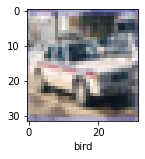